# Exploratory Data Analysis

**Task**: `Do the Data Cleaning and Analyse of the data in python - pandas.`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
df = pd.read_csv('data/titanic.csv', encoding='latin1')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  950 non-null    int64  
 1   Survived     947 non-null    float64
 2   Pclass       950 non-null    object 
 3   Name         950 non-null    object 
 4   Sex          949 non-null    object 
 5   Age          765 non-null    float64
 6   SibSp        950 non-null    int64  
 7   ParCh        950 non-null    int64  
 8   Ticket       950 non-null    object 
 9   Fare         948 non-null    float64
 10  Cabin        219 non-null    object 
 11  Embarked     946 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 89.2+ KB


## Data Analysis
Looking into the data, the following columns have no null values:
* PassengerId,
* Pclass,
* Name,
* SibSp,
* ParCh, and
* Ticket       

### Check Categorical Columns

In [4]:
print(df['Survived'].value_counts())
print("\n", df['Pclass'].value_counts())
print("\n", df['Sex'].value_counts())

Survived
0.0    584
1.0    361
3.0      2
Name: count, dtype: int64

 Pclass
3                    521
1                    232
2                    195
Daher, Mr. Shedid      1
Samaan, Mr. Elias      1
Name: count, dtype: int64

 Sex
male      612
female    336
22.5        1
Name: count, dtype: int64


In [5]:
print(df['SibSp'].value_counts())
print("\n", df['ParCh'].value_counts())
print("\n", df['Embarked'].value_counts()) 

SibSp
0    644
1    227
2     31
4     19
3     17
8      7
5      5
Name: count, dtype: int64

 ParCh
0       722
1       126
2        84
3         6
5         5
4         4
6         1
2698      1
2662      1
Name: count, dtype: int64

 Embarked
S    680
C    183
Q     83
Name: count, dtype: int64


### Treat Null Values

In [22]:
# Check the percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Percent Missing': percent_missing})
print(missing_value_df)

             Percent Missing
PassengerId         0.000000
Survived            0.315789
Pclass              0.000000
Name                0.000000
Sex                 0.105263
Age                19.473684
SibSp               0.000000
ParCh               0.000000
Ticket              0.000000
Fare                0.210526
Cabin              76.947368
Embarked            0.421053


Hence the following columns null values are smaller, we can drop null valued rows since the percentage is smaller and will not going make such an impact on the data.
* Survived
* Sex
* Fare, and
* Embarked
* Cabin - I will drop this column hence it holds almost 80% null values

Then, I'll start dropping the column with a higher number of null rows, i.e., `Embarked` then see the impact on the others.

In [6]:
df.drop('Cabin', axis=1, inplace=True)

In [7]:
df.dropna(subset=['Embarked'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 949
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  946 non-null    int64  
 1   Survived     943 non-null    float64
 2   Pclass       946 non-null    object 
 3   Name         946 non-null    object 
 4   Sex          946 non-null    object 
 5   Age          761 non-null    float64
 6   SibSp        946 non-null    int64  
 7   ParCh        946 non-null    int64  
 8   Ticket       946 non-null    object 
 9   Fare         946 non-null    float64
 10  Embarked     946 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 88.7+ KB


After dropping the null values from `Embarked` column, all others columns, except Survived, null valued rows are also dropped. Now let's drop Survived null valued rows as well.

In [9]:
df.dropna(subset='Survived', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 949
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  943 non-null    int64  
 1   Survived     943 non-null    float64
 2   Pclass       943 non-null    object 
 3   Name         943 non-null    object 
 4   Sex          943 non-null    object 
 5   Age          758 non-null    float64
 6   SibSp        943 non-null    int64  
 7   ParCh        943 non-null    int64  
 8   Ticket       943 non-null    object 
 9   Fare         943 non-null    float64
 10  Embarked     943 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 88.4+ KB


Now its time to treat Age null values, but before that let's check the column first.

In [10]:
print('Min Age: ', df['Age'].min(), '\anMax Age: ', df['Age'].max(), '\nAvg Age: ', df['Age'].mean())

Min Age:  0.42 
Max Age:  80.0 
Avg Age:  29.853786279683376


In [11]:
df[df['Age'] == df['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked
803,804,1.0,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C


### Check the `Age` Distribution
To see the Age data distribution, I will use histogram, box plot and Q-Q plots.

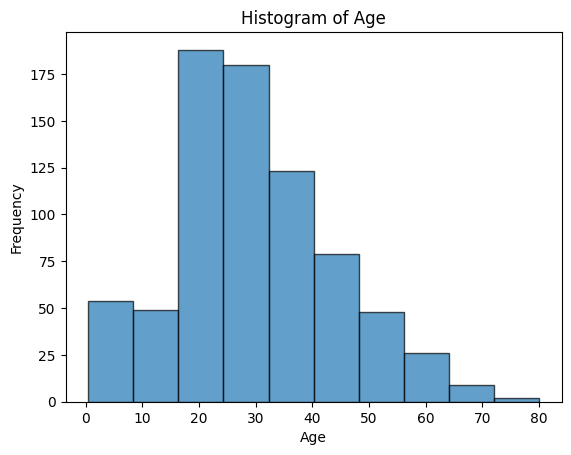

In [12]:
plt.hist(df['Age'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Based on the above Histogram plot, the data looks not normally distributed hence majority of the data is contentrated between 20-40. There is a longer tail extending towards the higher age values (up to 80), which suggests the presence of fewer older individuals. This shape is not bell-curved and indicates that the data is likely not normally distributed. This shows a right skewed data.

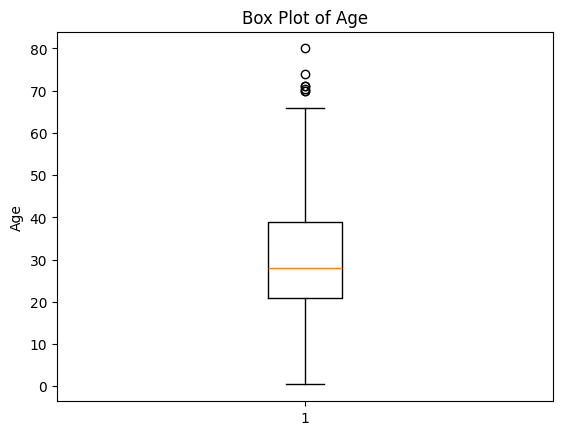

In [13]:
# Check for any potential outlier values
plt.boxplot(df['Age'].dropna())  # Drop NaN values
plt.title('Box Plot of Age')
plt.ylabel('Age') 
plt.show()

The median is closer to the bottom of the box, indicating a right skewed data. There are outliers on the upper end, which indicates that some age values significantly deviated from the main distribution.

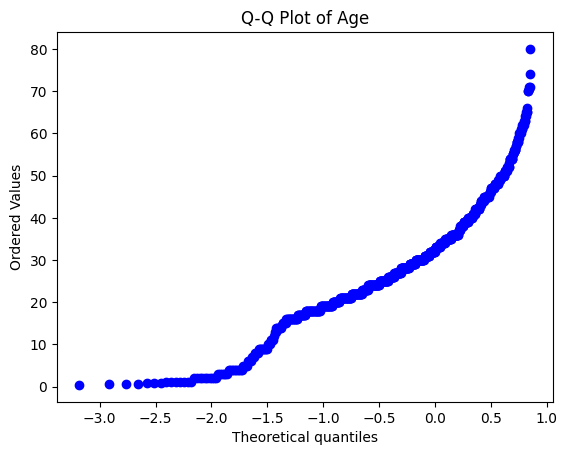

In [14]:
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')
plt.show()


The points deviate considerably from the 45-degree line, especially at the upper end, showing a heavy right tail. This curve is indicative of a positively skewed distribution rather than a normal distribution.

Considering the above three plots it will be better to use Median value to fill null values with since the data is skewed. 

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 949
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  943 non-null    int64  
 1   Survived     943 non-null    float64
 2   Pclass       943 non-null    object 
 3   Name         943 non-null    object 
 4   Sex          943 non-null    object 
 5   Age          943 non-null    float64
 6   SibSp        943 non-null    int64  
 7   ParCh        943 non-null    int64  
 8   Ticket       943 non-null    object 
 9   Fare         943 non-null    float64
 10  Embarked     943 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 88.4+ KB


Now all columns hold a non-null values which makes our downstream data analysis much easier.